# NLP Pipeline - Concepts and Phases

### Web-Scrapping / Data Acquisition

In [1]:
from bs4 import BeautifulSoup

import requests
myurl = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"
req = requests.get(myurl)
soup = BeautifulSoup(req.text, "html.parser")

que = soup.find_all("h1")[0]
print("Question: \n")
print(que.text)
print("\n")

# Alternate method for multiple text with h1
# que = soup.find_all("h1")
# for q in que:
#    print(q.text)

ans = soup.find_all("div", {"class": "s-prose js-post-body"})

# Another way to get the codes if the answers are just codes.
# ans = soup.find_all("code")

for i in ans:
    print("Answer: \n")
    print(i.text)


Question: 

How do I get the current time?


Answer: 


How do I get the current time?

Answer: 


Use datetime:
>>> import datetime
>>> now = datetime.datetime.now()
>>> now
datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
>>> print(now)
2009-01-06 15:08:24.789150

For just the clock time without the date:
>>> now.time()
datetime.time(15, 8, 24, 78915)
>>> print(now.time())
15:08:24.789150


To save typing, you can import the datetime object from the datetime module:
>>> from datetime import datetime

Then remove the prefix datetime. from all of the above.

Answer: 


Use time.strftime():
>>> from time import gmtime, strftime
>>> strftime("%Y-%m-%d %H:%M:%S", gmtime())
'2009-01-05 22:14:39'


Answer: 


from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

Example output: '2013-09-18 11:16:32'
See list of strftime directives.

Answer: 


Similar to Harley's answer, but use the str() function for a quick-n-dirty, slightly more human readable format:
>>> from dateti

### Extraction from PDF documents

In [2]:
import PyPDF2

import pdfminer
from pdfminer.high_level import extract_text, extract_pages
from pdfminer.image import ImageWriter

import fitz

In [3]:
# Using PyPDF to read the data from PDF
from PyPDF2 import PdfReader

reader = PdfReader("sample_slide.pdf")
page = reader.pages[0] # Only 1 page in pdf (To read multiple pages, use loop)
page_text = page.extract_text()
print(page_text)

NaturalLanguageProcessing
Natural language processing (NLP) is a subfield of linguistics, computer science, and 
artificial intelligence concerned with the interactions between computers and 
human language, how to program computers to process and analyze large amounts 
of natural language data. 
•Language Modelling
•TextClassification
•InformationExtraction
•TopicModelling
•Information Retrieval
•Text Summarization 
•Question Answering 
•Machine Translation 
•Conversational Agent 


In [4]:
# Using PDF miner to get the text from the pdf
from io import StringIO
from pdfminer.high_level import extract_text_to_fp
output_string = StringIO()
with open('sample_data.pdf', 'rb') as fin:
    extract_text_to_fp(fin, output_string)
print(output_string.getvalue().strip())

Natural Language ProcessingNatural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, how to program computers to process and analyze large amounts of natural language data. • Language Modelling • Text Classification • Information Extraction • Topic Modelling • Information Retrieval • Text Summarization • Question Answering • Machine Translation • Conversational Agent


In [5]:
# Using PDF miner to get the images from the pdf

pages = list(extract_pages('sample_data.pdf'))
page = pages[0]


def get_image(layout_object):
    if isinstance(layout_object, pdfminer.layout.LTImage):
        return layout_object
    if isinstance(layout_object, pdfminer.layout.LTContainer):
        for child in layout_object:
            return get_image(child)
    else:
        return None

# Set the output directory path
output_dir = "C:\\aiprojects\\nlp-projects\\nlp-getting-started"

def save_images_from_page(page: pdfminer.layout.LTPage):
    images = list(filter(bool, map(get_image, page)))
    iw = ImageWriter('output_dir')
    for image in images:
        iw.export_image(image)


save_images_from_page(page)

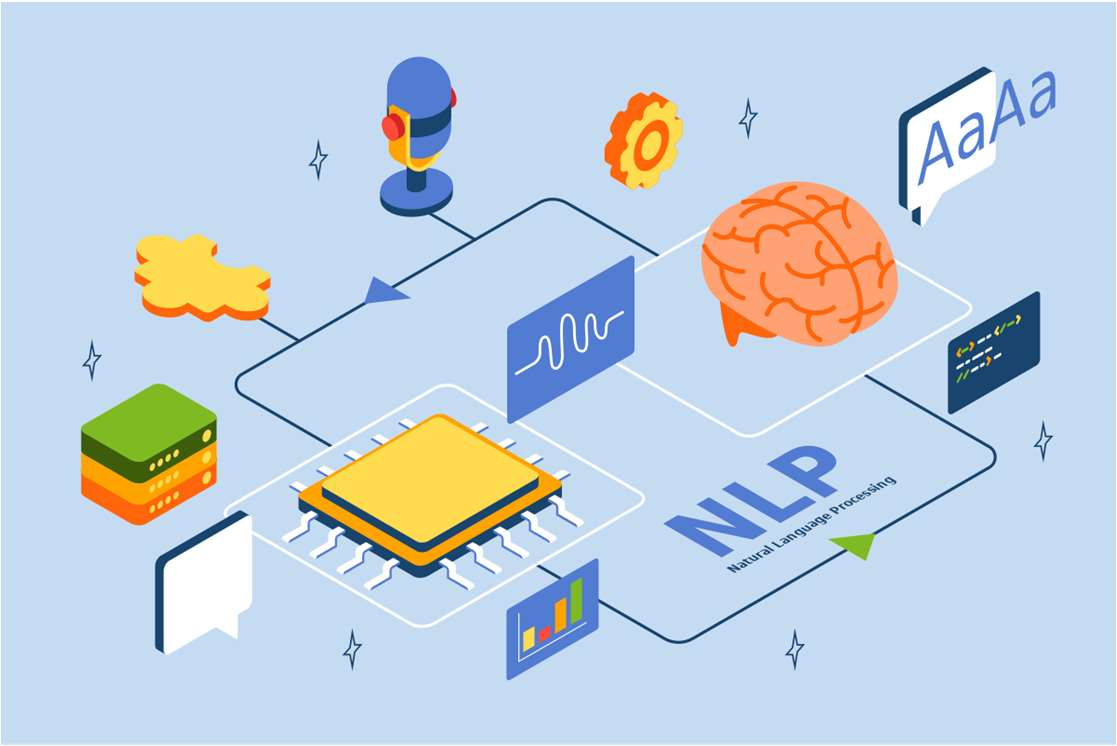

In [6]:
# Showing the extracted image
from PIL import Image
from IPython.display import display
img = Image.open('C:\\aiprojects\\nlp-projects\\nlp-getting-started\\output_dir\\Image1.jpg')
display(img)

In [7]:
# Using Fitz library
document = fitz.open("sample_slide.pdf")
pages = document.load_page(0)
page_text = pages.get_text()
print(page_text)

Natural Language Processing
Natural language processing (NLP) is a subfield of linguistics, computer science, and 
artificial intelligence concerned with the interactions between computers and 
human language, how to program computers to process and analyze large amounts 
of natural language data. 
• Language Modelling
• Text Classification
• Information Extraction
• Topic Modelling
• Information Retrieval
• Text Summarization 
• Question Answering 
• Machine Translation 
• Conversational Agent 



### Extraction from scanned images

In [8]:
# Extracting text from scanned PDFs using Tesseract OCR Library

import pytesseract
from PIL import Image

Source: https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_scanned_image.png

Input:

![Scanned Image](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_scanned_image.png)

In [9]:
import pytesseract

Downnload the Tesseract-OCR library from [https://github.com/UB-Mannheim/tesseract/wiki]

In [10]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [11]:
im = Image.open("C:\\aiprojects\\nlp-projects\\nlp-getting-started\\NLP_scanned_image.png")  

# pil_image = Image.frombytes("RGB", [im.width, im.height], im.samples)
extracted_text = []
text = pytesseract.image_to_string(im)
extracted_text.append(text)
print(extracted_text)


['In the nineteenth century the only kind of linguistics considered\nseriously was this comparative and historical study of words in languages\nknown or believed to be cognate—say the Semitic languages, or the Indo-\nEuropean languages. It is significant that the Germans who really made\nthe subject what it was, used the term Indo-germanisch. Those who know\nthe popular works of Otto Jespersen will remember how firmly he\ndeclares that linguistic science is historical. And those who have noticed\n']


### Text Cleaning

In [12]:
# Removing non-textual symbols and special characters.

text = "I love this!!! 😊  Let's all be happy !😊"  

In [13]:
import re
def clean_sentence(sentence):
    # Use re (Regular Expression) to replace everything other than A-Z or a-z with '' (nothing)
    cleaned_sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)
    return cleaned_sentence
cleaned_sentence = clean_sentence(text)
print(cleaned_sentence)

# Use: Sentiment Analysis, Tweet Analysis (cleaning), Emoji Classifier

I love this   Lets all be happy 


In [14]:
print(text.encode("utf-8"))

b"I love this!!! \xf0\x9f\x98\x8a  Let's all be happy !\xf0\x9f\x98\x8a"


#### Spelling Correction

In [15]:
# Install textblob library
# pip install textblob

In [16]:
from textblob import TextBlob

In [17]:
# TextBlob - can take text context into the consideration, uses probabilistic model to predict the correct word.
word1 = "maching"
word1_t = TextBlob(word1)
corrected_word = str(word1_t.correct())
print(corrected_word)


machine


In [18]:
# Install pyspellchecker library
# pip install pyspellchecker
# Reference: https://pyspellchecker.readthedocs.io/en/latest/

In [19]:
from spellchecker import SpellChecker
spell = SpellChecker()
word2 = 'computr'
misspellings = spell.unknown([word2])
corrected_word = spell.correction(word2)
print(corrected_word)

computer


In [20]:
spell.candidates(word2)

{'compute', 'computer'}

#### Microsoft's API Spell Checker

In [21]:
# Using REST API - Spell Checker
# MS Azure Account - Keys and Endpoint
# Reference: https://learn.microsoft.com/en-us/bing/search-apis/bing-spell-check/reference/endpoints

import requests
import json

# Uncomment api_key and endpoint lines

# api_key = "Enter Key Here"
example_text = ["flwr", "bal", "unkwn"]
# endpoint = "https://api.bing.microsoft.com/v7.0/spellcheck" 

data = {'text': example_text}
params = {
    'mkt':'en-us',
    'mode':'proof'
    }
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Ocp-Apim-Subscription-Key': api_key,
    }
response = requests.post(endpoint, headers=headers, params=params, data=data)
json_response = response.json()
print(json.dumps(json_response, indent=4))

{
    "error": {
        "code": "401",
        "message": "Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource."
    }
}


### Text Pre-processing
#### Process of preparing raw text and extract knowledge


#### Sentence Tokenization

In [22]:
mytext = """In the previous chapter, we saw examples of some common NLP applications that we might encounter in everyday life. If we were asked to build such an application, think about how we would approach doing so at our organization. We would normally walk through the requirements and break the problem down into several sub-problems, then try to develop a step-by-step procedure to solve them. Since language processing is involved, we would also list all the forms of text processing needed at each step. This step-by-step processing of text is known as pipeline. """

In [23]:
# Install Natural Language Toolkit (nltk)
# pip install nltk

In [24]:
import nltk
# nltk.download()

In [25]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(mytext)
print(sentences)

['In the previous chapter, we saw examples of some common NLP applications that we might encounter in everyday life.', 'If we were asked to build such an application, think about how we would approach doing so at our organization.', 'We would normally walk through the requirements and break the problem down into several sub-problems, then try to develop a step-by-step procedure to solve them.', 'Since language processing is involved, we would also list all the forms of text processing needed at each step.', 'This step-by-step processing of text is known as pipeline.']


In [26]:
# for sent in sentences:
#     print(sent)
# enumerate - built in function that allows the for loop to iterate with the ...
# ... index and the element inside the iterable (list / tuple)
for idx, sentence in enumerate(sentences):
    print(f"Sentence {idx+1}\n {sentence}")  

Sentence 1
 In the previous chapter, we saw examples of some common NLP applications that we might encounter in everyday life.
Sentence 2
 If we were asked to build such an application, think about how we would approach doing so at our organization.
Sentence 3
 We would normally walk through the requirements and break the problem down into several sub-problems, then try to develop a step-by-step procedure to solve them.
Sentence 4
 Since language processing is involved, we would also list all the forms of text processing needed at each step.
Sentence 5
 This step-by-step processing of text is known as pipeline.


#### Word Tokenization

In [27]:
from nltk.tokenize import word_tokenize
sentence = "This step-by-step processing of text is known as pipeline."
words = word_tokenize(sentence)
print(words)

['This', 'step-by-step', 'processing', 'of', 'text', 'is', 'known', 'as', 'pipeline', '.']


#### Removal Stop Words

In [28]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
clean_words = [word for word in words if word not in stop_words] # List comprehension
print(clean_words)

['This', 'step-by-step', 'processing', 'text', 'known', 'pipeline', '.']


In [29]:
# Removing custom words like "This".
c_words = [word if word != "This" else 'NA' for word in words]
print(c_words)

['NA', 'step-by-step', 'processing', 'of', 'text', 'is', 'known', 'as', 'pipeline', '.']


### Stemming : Reduces the word to a base form

In [30]:
from nltk.stem import porter
stemmer = porter.PorterStemmer()
stemmer.stem("airlines")
# Lemmatization is more effective compared to stemming.

'airlin'

### Lemmatization : Reducing the word to a base form (available in dictionary)

In [31]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("airlines", pos="n")
# pos = "n" indicates the word is noun

'airline'

### Stemming Vs Lemmatization

In [32]:
# Testing the accuracy of stemming Vs lemmatization for multiple words.
word_list = ['well-dressed', 'airliner', 'better', 'was', 'meeting', 'uncomfortable']
stemmed_words = []
lemmatized_words = []
for word in word_list:
    stemmed_word = stemmer.stem(word)
    stemmed_words.append(stemmed_word)
    lemmatized_word = lemmatizer.lemmatize(word)
    lemmatized_words.append(lemmatized_word)
print("Stemmed Words: ", stemmed_words)
print("Lemmatized Words: ", lemmatized_words)

Stemmed Words:  ['well-dress', 'airlin', 'better', 'wa', 'meet', 'uncomfort']
Lemmatized Words:  ['well-dressed', 'airliner', 'better', 'wa', 'meeting', 'uncomfortable']


### Contractions : Expanding contractions

In [33]:
test_sentence = "Everything we’re doing now is great. However, we don't want to relax now. And this isn't the time to relax at all."

In [34]:
# Replacing we're with we are
import re
pattern = r'we[\’\']re'
replacement = 'we are'
expanded_sentence = re.sub(pattern,replacement,test_sentence)
print(expanded_sentence)
# Feeding this sentence to the next iteration to replace don't with "do not".

Everything we are doing now is great. However, we don't want to relax now. And this isn't the time to relax at all.


In [35]:
pattern = r'don[\’\']t'
replacement = 'do not'
expanded_sentence = re.sub(pattern,replacement,expanded_sentence)
print(expanded_sentence)
# Feeding this sentence to the next iteration to replace isn't with "is not".

Everything we are doing now is great. However, we do not want to relax now. And this isn't the time to relax at all.


In [36]:
pattern = r'isn[\’\']t'
replacement = 'is not'
expanded_sentence = re.sub(pattern,replacement,expanded_sentence)
print(expanded_sentence)

Everything we are doing now is great. However, we do not want to relax now. And this is not the time to relax at all.


### POS Tagging : Finding the Parts-Of-Speech of words

In [37]:
# Install spacy library
# pip install spacy

#### Load Spacy Language Model

In [38]:
# Install spacy packages
# ! python -m spacy download en_core_web_sm

In [39]:
import spacy

In [40]:
nlp = spacy.load('en_core_web_sm')

In [41]:
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)
print(doc)

When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously. “I can tell you very senior CEOs of major American car companies would shake my hand and turn away because I wasn’t worth talking to,” said Thrun, in an interview with Recode earlier this week.


In [42]:
# Finding noun phrases
for noun in doc.noun_chunks:
    print(noun)

Sebastian Thrun
self-driving cars
Google
few people
the company
him
I
you
very senior CEOs
major American car companies
my hand
I
Thrun
an interview
Recode


In [43]:
# Finding verbs phrases
for word in doc:
    if word.pos_ == "VERB":
        print(word)

started
working
driving
took
tell
shake
turn
talking
said


#### Adjectives

In [44]:
# Finding adjectives
for word in doc:
    if word.pos_ == "ADJ":
        print(word)

Sebastian
few
senior
major
American
worth


In [45]:
# Finding entities - IMPORTANT
for entity in doc.ents:
    print(entity, entity.label_)

Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode ORG
earlier this week DATE


### Parsing

In [46]:
# Sentence Chunks - phrases
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_)

# Iterating for nouns in the document
# chunk.text = original noun
# chunk.root.text = The text of the root word of the chunk...
# ... In a noun phrase, this is typically the main noun that the phrase centers around.
# chunk.root.dep_ = The grammatical dependency label of the root word. For example, ...
# ... it might indicate whether the root word is the subject, object, or other part of the sentence's structure.

Sebastian Thrun Thrun nsubj
self-driving cars cars pobj
Google Google pobj
few people people nsubj
the company company pobj
him him dobj
I I nsubj
you you dative
very senior CEOs CEOs nsubj
major American car companies companies pobj
my hand hand dobj
I I nsubj
Thrun Thrun nsubj
an interview interview pobj
Recode Recode pobj


### Displacy

In [47]:
text = "I am looking at you. You better watch out."
text = "Thrun, who heads GoogleX, was also teaching in MOOC."
doc = nlp(text)

In [48]:
from spacy import displacy
displacy.render(doc, style='dep')

### Entity Recognition

In [49]:
text = "John heads Google.He also teaches in School."
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

John 0 4 PERSON
Google 11 17 ORG
School 37 43 ORG


In [50]:
displacy.render(doc, style='ent')

### Coreference Resolution

In [51]:
# Install neuralcoref
# pip install neuralcoref

In [57]:
print(spacy.__version__)

3.7.2


In [59]:
# Currently, neuralcoref is not supporting Spacy version > 3. Modify the following code later.
# import neuralcoref
# neuralcoref.add_to_pipe(nlp)
# elon_text = """Musk was born to a Canadian mother and South African father  and raised in Pretoria, South Africa.  He briefly attended the University of Pretoria before moving to Canada  when he was 17 to attend Queen's University. """

In [60]:
"""
elon_text = Musk was born to a Canadian mother and South African father 
and raised in Pretoria, South Africa. 
He briefly attended the University of Pretoria before moving to Canada 
when he was 17 to attend Queen's University. 
He transferred to the University of Pennsylvania two years later, 
where he received dual bachelor's degrees in economics and physics. 
He moved to California in 1995 to begin a Ph.D. in 
applied physics and material sciences at Stanford University 
but dropped out after two days to pursue a business career, 
co-founding web software company Zip2 with his brother Kimbal. 
The start-up was acquired by Compaq for $307 million in 1999. Musk co-founded online bank X.com that same year, which merged with Confinity in 2000 to form the company PayPal and was subsequently bought by eBay in 2002 for $1.5 billion.

"""

"\nelon_text = Musk was born to a Canadian mother and South African father \nand raised in Pretoria, South Africa. \nHe briefly attended the University of Pretoria before moving to Canada \nwhen he was 17 to attend Queen's University. \nHe transferred to the University of Pennsylvania two years later, \nwhere he received dual bachelor's degrees in economics and physics. \nHe moved to California in 1995 to begin a Ph.D. in \napplied physics and material sciences at Stanford University \nbut dropped out after two days to pursue a business career, \nco-founding web software company Zip2 with his brother Kimbal. \nThe start-up was acquired by Compaq for $307 million in 1999. Musk co-founded online bank X.com that same year, which merged with Confinity in 2000 to form the company PayPal and was subsequently bought by eBay in 2002 for $1.5 billion.\n\n"

In [62]:
# doc = nlp(elon_text)